Regression Model Evaluation:
Mean Squared Error (MSE): 838.20
R-squared (R2): 1.00


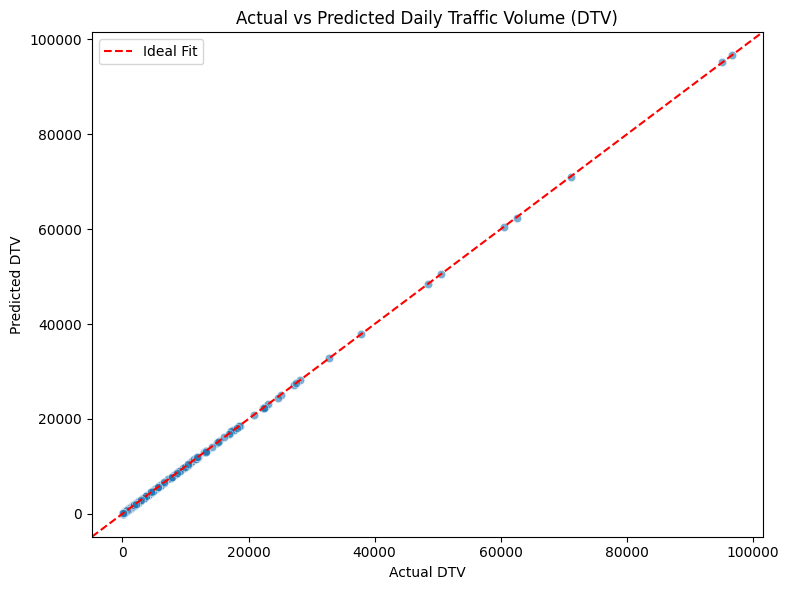

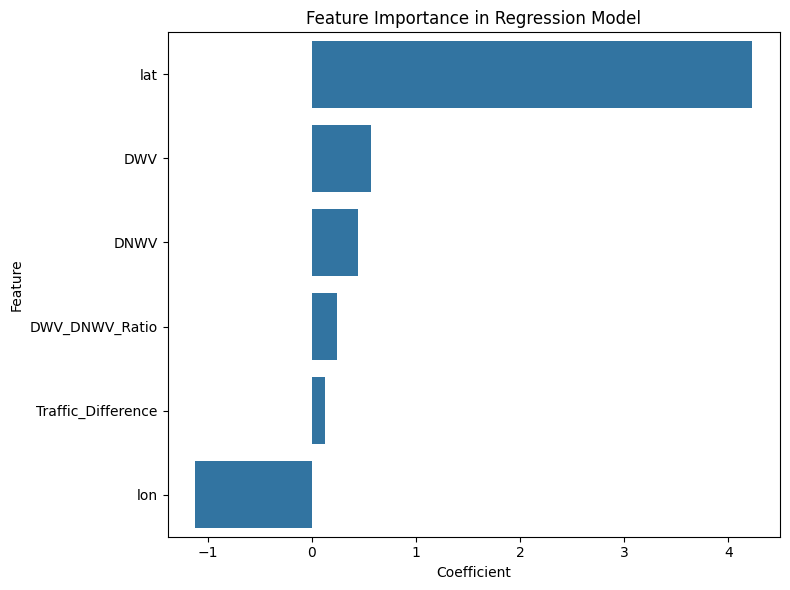

Key Insights from Regression:
1. The model captures trends in DTV based on explanatory variables like DWV and DNWV.
2. R-squared value indicates the proportion of variance in DTV explained by the model.
3. Feature importance shows which variables contribute most to the predictions.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Preprocess the data
# Convert relevant columns to numeric if needed
for col in ['DTV', 'DWV', 'DNWV', 'lon', 'lat']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['DTV', 'DWV', 'DNWV', 'lon', 'lat'])

# Feature Engineering: Create new features for modeling
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']
data['Traffic_Difference'] = data['DWV'] - data['DNWV']

# Define features and target for regression
X = data[['DWV', 'DNWV', 'lon', 'lat', 'DWV_DNWV_Ratio', 'Traffic_Difference']]
y = data['DTV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize Actual vs Predicted DTV
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual DTV')
plt.ylabel('Predicted DTV')
plt.title('Actual vs Predicted Daily Traffic Volume (DTV)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=1.5, label='Ideal Fit')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize Feature Importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Regression Model')
plt.tight_layout()
plt.show()

# Key Observations
print("Key Insights from Regression:")
print("1. The model captures trends in DTV based on explanatory variables like DWV and DNWV.")
print("2. R-squared value indicates the proportion of variance in DTV explained by the model.")
print("3. Feature importance shows which variables contribute most to the predictions.")
